In [31]:
##View os and imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os
print(os)

<module 'os' from 'C:\\Users\\14029\\anaconda3\\lib\\os.py'>


In [23]:
##Reading in csv files and viewing data for analysis
birthrate = pd.read_csv('birth-rate.csv')

crime = pd.read_csv('crimeratesbystate-formatted.csv')

education = pd.read_csv('education.csv')

In [24]:
birthrate.head(10)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400000,35.179,33.863,32.459,30.994,29.513000,28.069,26.721,25.518,...,15.024000,14.528000,14.041000,13.579000,13.153000,12.772000,12.441000,12.159000,11.919000,11.716000
1,Afghanistan,52.201000,52.206,52.208,52.204,52.192,52.168000,52.130,52.076,52.006,...,51.229000,50.903000,50.486000,49.984000,49.416000,48.803000,48.177000,47.575000,47.023000,46.538000
2,Angola,54.432000,54.394,54.317,54.199,54.040,53.836000,53.585,53.296,52.984,...,48.662000,48.355000,48.005000,47.545000,46.936000,46.184000,45.330000,44.444000,43.607000,42.875000
3,Albania,40.886000,40.312,39.604,38.792,37.913,37.008000,36.112,35.245,34.421,...,17.713000,16.850000,16.081000,15.444000,14.962000,14.644000,14.485000,14.464000,14.534000,14.649000
4,Netherlands Antilles,32.321000,30.987,29.618,28.229,26.849,25.518000,24.280,23.173,22.230,...,15.809000,15.412000,15.096000,14.824000,14.565000,14.309000,14.051000,13.790000,13.532000,13.281000
5,Arab World,47.611217,NaN,NaN,NaN,NaN,46.572876,NaN,NaN,NaN,...,29.073137,28.682796,28.305238,27.962437,27.670074,27.378971,27.118861,26.855318,26.593517,26.324048
6,United Arab Emirates,45.924000,45.098,44.196,43.241,42.253,41.232000,40.168,39.056,37.906,...,17.569000,17.168000,16.811000,16.456000,16.073000,15.650000,15.201000,14.754000,14.347000,14.004000
7,Argentina,23.809000,23.577,23.349,23.130,22.931,22.761000,22.633,22.552,22.527,...,18.983000,18.641000,18.332000,18.066000,17.849000,17.680000,17.553000,17.454000,17.364000,17.269000
8,Armenia,35.408000,34.767,33.792,32.495,30.937,29.232000,27.515,25.922,24.565,...,13.373000,13.340000,13.511000,13.799000,14.124000,14.441000,14.719000,14.947000,15.138000,15.299000
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.600000,NaN,NaN


In [25]:
crime.head(10)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8
6,Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5
7,Connecticut,2.9,20.0,113.0,138.6,437.1,1824.1,296.8
8,Delaware,4.4,44.7,154.8,428.2,688.9,2144.0,278.5
9,District of Columbia,35.4,30.2,672.1,721.3,649.7,2694.9,1402.3


In [26]:
education.head(10)

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6
5,California,500,513,498,49,10.9,5.5
6,Colorado,568,575,555,20,8.1,6.9
7,Connecticut,509,513,512,83,6.6,2.1
8,Delaware,495,498,484,71,7.9,5.5
9,District of Columbia,466,451,461,79,6.3,7.1


In [15]:
##Set up histogram for birth rates
birthrate_hist = pd.melt(birthrate, id_vars="Country", var_name="Year", value_name = 'BirthRate').fillna(0)
birthrate_hist["BirthRate_int"] = birthrate_hist["BirthRate"]
birthrate_hist.head()

,Country,Year,BirthRate,BirthRate_int
0,Aruba,1960,36.400,36.400
1,Afghanistan,1960,52.201,52.201
2,Angola,1960,54.432,54.432
3,Albania,1960,40.886,40.886
4,Netherlands Antilles,1960,32.321,32.321


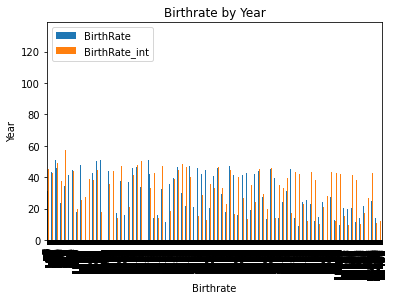

In [19]:
birthrate_hist.plot(kind = 'bar')
plt.ylabel("Year")
plt.xlabel("Birthrate")
plt.title("Birthrate by Year")
plt.show()

<AxesSubplot:xlabel='Country', ylabel='BirthRate'>

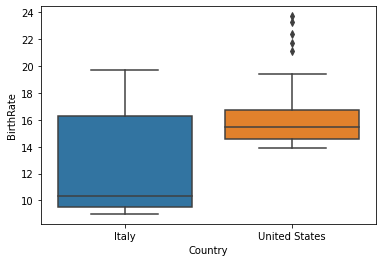

In [30]:
##Set up box plot to show comparison between United States and Italy
birthrate_box = birthrate_hist[(birthrate_hist["Country"]=="United States") | (birthrate_hist["Country"]=="Italy")]
sns.boxplot(x = birthrate_box["Country"], y=birthrate_box["BirthRate"])

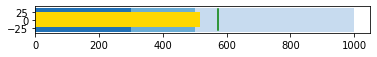

In [40]:
##WAs going to set up a bullet chart for each state but defaulted to one "United States" for processing reasons
education_bullet = education[education["state"]=="United States"][["state","math"]]
education_bullet['target'] = 572
education_bullet_tuple = [tuple(x) for x in education_bullet.values][0]

# set parameter for bullet chart
limits = [300, 500, 1000]
palette = sns.color_palette("Blues_r", len(limits))
fig, ax = plt.subplots()
ax.set_aspect('equal')

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=75, color=palette[idx])
    prev_limit = lim
    
# draw the value we're measuring
ax.barh([1], education_bullet_tuple[1], color='gold', height=45)

ax.axvline(education_bullet_tuple[2], color="green", ymin=0.10, ymax=0.9)

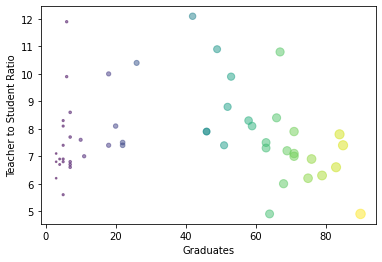

In [46]:
##Set up bubble chart 

x = education['percent_graduates_sat']
y = education['pupil_staff_ratio']

plt.scatter(x, y, s = x, alpha = 0.5, c = x)
plt.xlabel('Graduates')
plt.ylabel('Teacher to Student Ratio')
plt.show()